<a href="https://colab.research.google.com/github/johnjustine5646/Lab3_ML/blob/main/2348522_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
data=pd.read_csv('/content/Market_Basket_Optimisation.csv')

In [4]:
data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.describe()

,olive oil
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [6]:
data.isnull().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [7]:
data2=data.drop(columns = ['olive oil'])
data2

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
transactions = []
for i in range(0,data2.shape[0]):
    transactions.append([str(data2.values[i,j])for j in range(0,data2.shape[1])])


In [9]:
data2.shape

(7500, 19)

In [10]:
data.isnull().sum().sum()

120657

#Dealing" Null Values





In [45]:
transactions = []

for i in range(0, data2.shape[0]):
    transaction = [str(data2.values[i, j]) for j in range(0, data2.shape[1]) if str(data2.values[i, j]) != 'nan']
    transactions.append(transaction)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
unique_items_set = set()
for transaction in transactions:
    unique_items_set.update(item for item in transaction)
unique_items_list = list(unique_items_set)

In [13]:
len(unique_items_list)

120

In [14]:
binary_matrix = pd.DataFrame(columns=unique_items_list)

# Populate the DataFrame with binary values using pandas.concat
data = []
for transaction in transactions:
    row = [1 if item in transaction else 0 for item in unique_items_list]
    data.append(row)

binary_matrix = pd.concat([binary_matrix, pd.DataFrame(data, columns=unique_items_list)], ignore_index=True)

print(binary_matrix)


     ham ketchup hand protein bar salad soup flax seed avocado salt chocolate  \
0      0       0                0     0    0         0       0    0         0   
1      0       0                0     0    0         0       0    0         0   
2      0       0                0     0    0         0       1    0         0   
3      0       0                0     0    0         0       0    0         0   
4      0       0                0     0    0         0       0    0         0   
...   ..     ...              ...   ...  ...       ...     ...  ...       ...   
7495   0       0                0     0    0         0       0    0         0   
7496   0       0                0     0    0         0       0    0         0   
7497   0       0                0     0    0         0       0    0         0   
7498   0       0                0     0    0         0       0    0         0   
7499   0       0                0     0    0         0       0    0         0   

     meatballs  ... parmesa

In [15]:
top10=binary_matrix.sum().sort_values(ascending=False)[:10]
top10

mineral water        1787
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1229
green tea             990
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
dtype: object

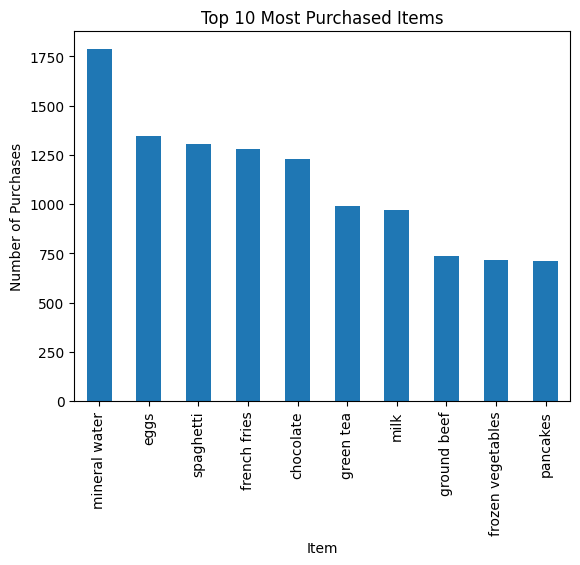

In [16]:
top10.plot(kind='bar')
plt.xlabel("Item")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Most Purchased Items")
plt.show()

In [17]:
bottom10=binary_matrix.sum().sort_values(ascending=True)[:10]
bottom10

 asparagus          1
water spray         3
napkins             5
cream               7
bramble            14
tea                29
mashed potato      31
chutney            31
chocolate bread    32
ketchup            33
dtype: object

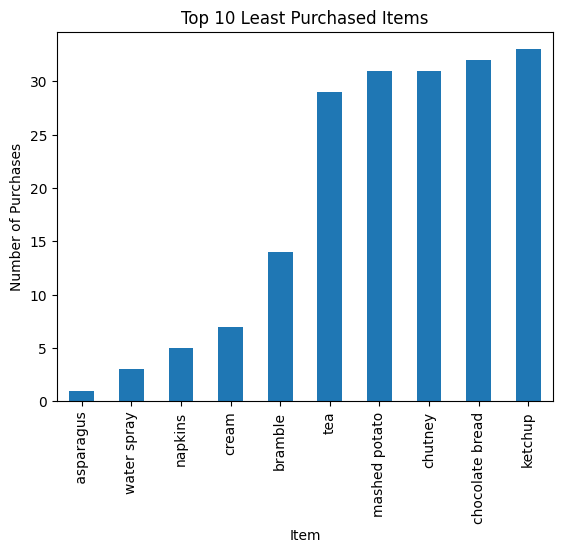

In [18]:
bottom10.plot(kind='bar')
plt.xlabel("Item")
plt.ylabel("Number of Purchases")
plt.title("Top 10 Least Purchased Items")
plt.show()

In [19]:
basket=pd.DataFrame(binary_matrix)

In [20]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
frequent_itemset = apriori(basket,min_support=0.02,use_colnames=True)
rules = association_rules(frequent_itemset,metric='lift',min_threshold=1)

/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [21]:
rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(soup),0.238267,0.050533,0.023067,0.096810,1.915771,0.011026,1.051237,0.627538
1,(soup),(mineral water),0.050533,0.238267,0.023067,0.456464,1.915771,0.011026,1.401441,0.503458
2,(eggs),(chocolate),0.179733,0.163867,0.033200,0.184718,1.127246,0.003748,1.025576,0.137617
3,(chocolate),(eggs),0.163867,0.179733,0.033200,0.202604,1.127246,0.003748,1.028681,0.135005
4,(chocolate),(frozen vegetables),0.163867,0.095333,0.022933,0.139951,1.468019,0.007311,1.051878,0.381291


In [22]:
 rules[(rules['confidence']>0.2) & (rules['lift']>1)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(soup),(mineral water),0.050533,0.238267,0.023067,0.456464,1.915771,0.011026,1.401441,0.503458
3,(chocolate),(eggs),0.163867,0.179733,0.033200,0.202604,1.127246,0.003748,1.028681,0.135005
5,(frozen vegetables),(chocolate),0.095333,0.163867,0.022933,0.240559,1.468019,0.007311,1.100986,0.352406
6,(french fries),(chocolate),0.170933,0.163867,0.034400,0.201248,1.228121,0.006390,1.046800,0.224044
7,(chocolate),(french fries),0.163867,0.170933,0.034400,0.209927,1.228121,0.006390,1.049354,0.222151
8,(chocolate),(spaghetti),0.163867,0.174133,0.039200,0.239219,1.373768,0.010665,1.085551,0.325397
9,(spaghetti),(chocolate),0.174133,0.163867,0.039200,0.225115,1.373768,0.010665,1.079042,0.329442
11,(ground beef),(chocolate),0.098267,0.163867,0.023067,0.234735,1.432478,0.006964,1.092607,0.334810
12,(milk),(chocolate),0.129600,0.163867,0.032133,0.247942,1.513074,0.010896,1.111794,0.389584
14,(mineral water),(chocolate),0.238267,0.163867,0.052667,0.221041,1.348907,0.013623,1.073398,0.339566


In [23]:
worst_choice=rules.sort_values(by='lift',ascending=True)
print('Worst choice to buy items together')
print(worst_choice[['antecedents','consequents','lift']])

Worst choice to buy items together
       antecedents      consequents      lift
69  (french fries)           (milk)  1.071339
68          (milk)   (french fries)  1.071339
51     (green tea)           (eggs)  1.073420
50          (eggs)      (green tea)  1.073420
16     (chocolate)      (green tea)  1.084893
..             ...              ...       ...
1           (soup)  (mineral water)  1.915771
76     (spaghetti)      (olive oil)  2.003547
77     (olive oil)      (spaghetti)  2.003547
73     (spaghetti)    (ground beef)  2.290857
72   (ground beef)      (spaghetti)  2.290857

[96 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
best_choice = rules.sort_values(by=['confidence', 'lift'], ascending=[False, False])
print('Best choice to buy items together')
print(best_choice[['antecedents', 'consequents', 'confidence','lift']])

Best choice to buy items together
        antecedents         consequents  confidence      lift
1            (soup)     (mineral water)    0.456464  1.915771
95      (olive oil)     (mineral water)    0.417850  1.753707
87    (ground beef)     (mineral water)    0.416554  1.748266
72    (ground beef)         (spaghetti)    0.398915  2.290857
32    (cooking oil)     (mineral water)    0.394256  1.654683
..              ...                 ...         ...       ...
0   (mineral water)              (soup)    0.096810  1.915771
30  (mineral water)           (chicken)    0.095691  1.594852
33  (mineral water)       (cooking oil)    0.084499  1.654683
90  (mineral water)  (whole wheat rice)    0.084499  1.443608
88  (mineral water)   (frozen smoothie)    0.084499  1.337012

[96 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
top10=best_choice.nlargest(10,'confidence')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


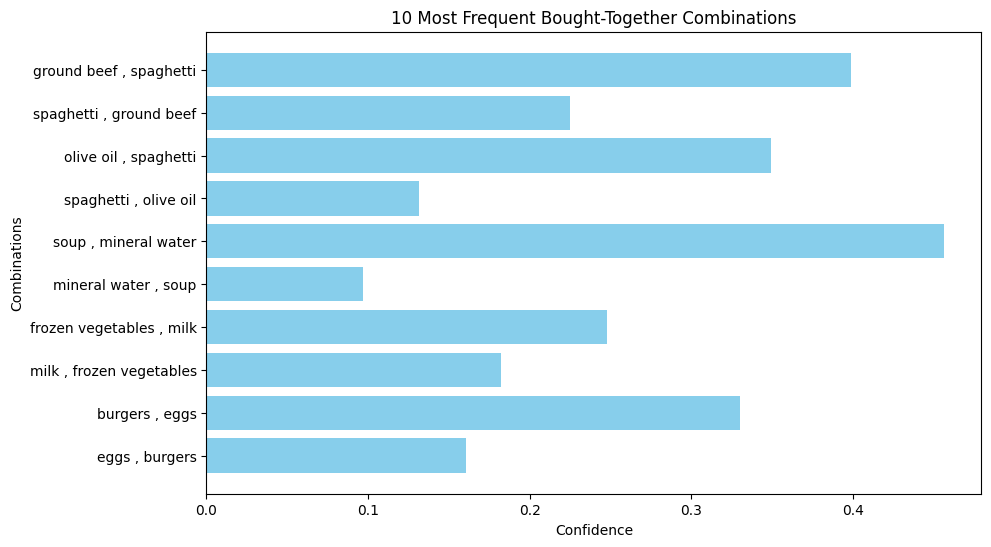

In [36]:
antecedents = top10['antecedents'].apply(lambda x: ', '.join(list(x)))
consequents = top10['consequents'].apply(lambda x: ', '.join(list(x)))


bar_labels = antecedents + ' , ' + consequents


plt.figure(figsize=(10, 6))
plt.barh(bar_labels, top10['confidence'], color='skyblue')
plt.xlabel('Confidence')
plt.ylabel('Combinations')
plt.title('10 Most Frequent Bought-Together Combinations')
plt.gca().invert_yaxis()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


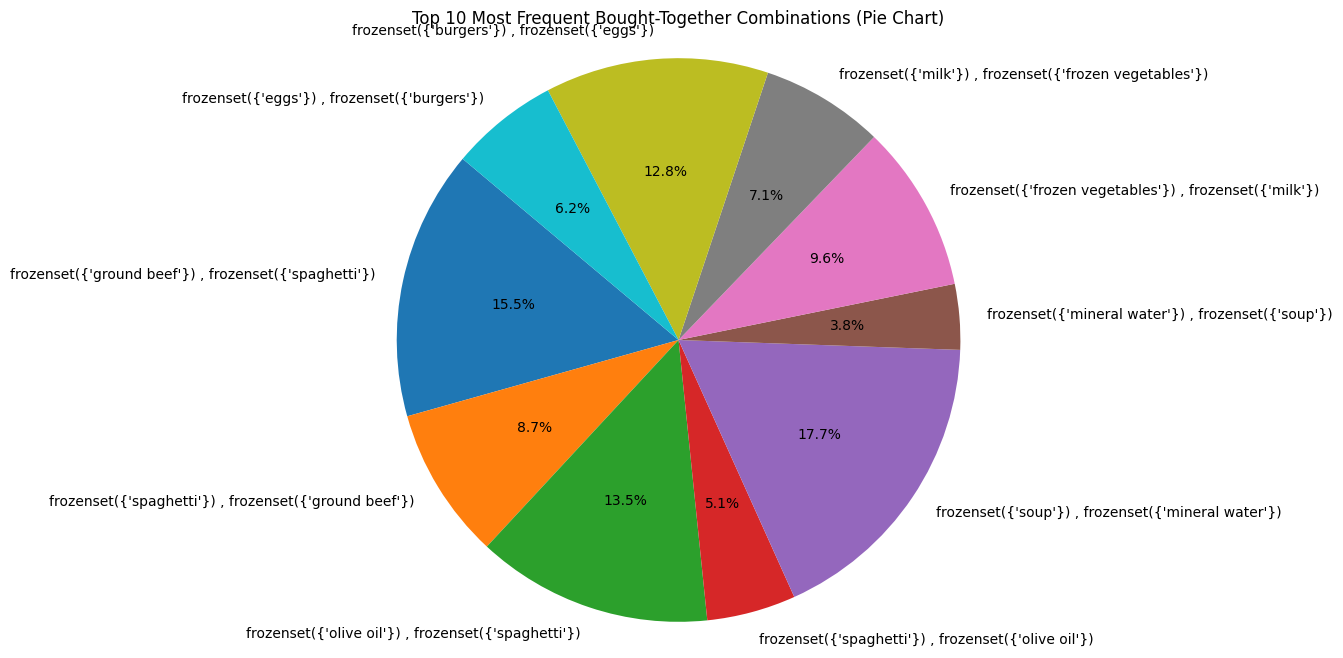

In [37]:
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
combinations = [' , '.join(map(str, combination)) for combination in zip(top10['antecedents'], top10['consequents'])]
support_values = top10['confidence']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(support_values, labels=combinations, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Top 10 Most Frequent Bought-Together Combinations (Pie Chart)')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(0.5, 1.0, 'Association Rules Strength Heatmap')

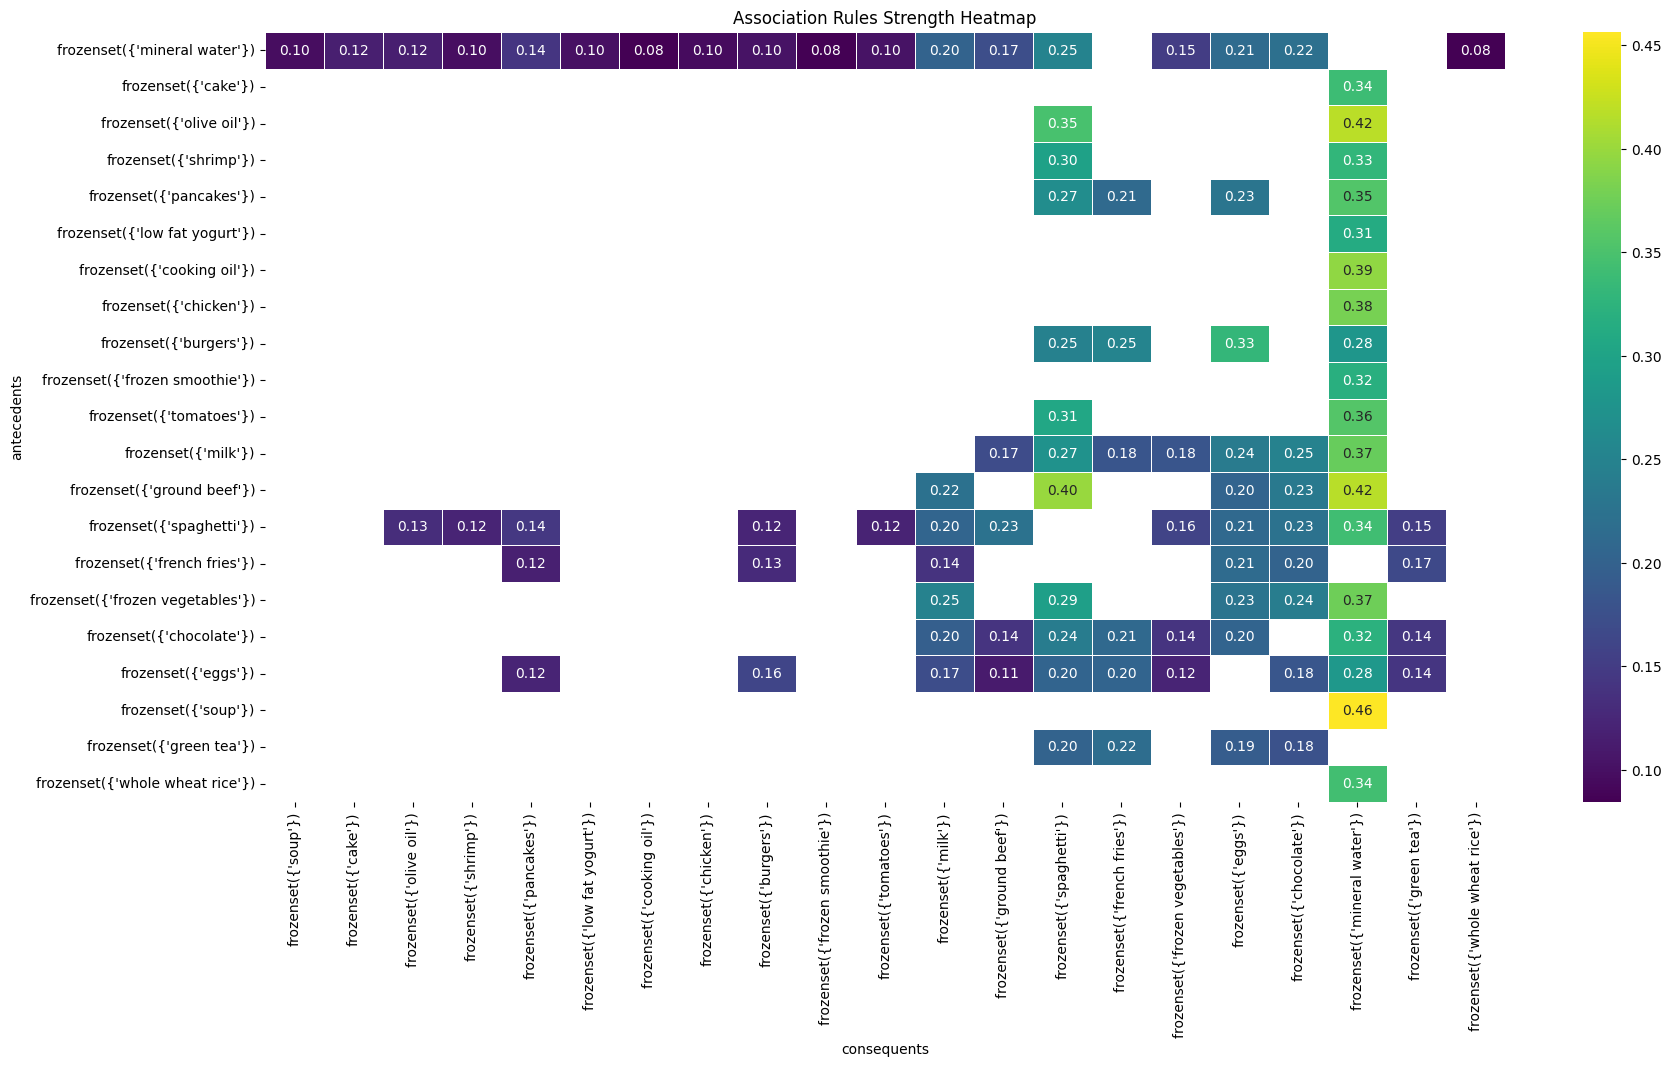

In [43]:
heatmap_data = rules.pivot_table(index='antecedents', columns='consequents', values='confidence', aggfunc='sum')

plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, annot=True, fmt='.2f', cmap='viridis', linewidths=0.5)
plt.title('Association Rules Strength Heatmap')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
